### requests 라이브러리
- 접근할 웹 페이지의 데이터를 요청/응답받기 위한 라이브러리

In [1]:
# 라이브러리 불러오기
# 만약 import 오류가 나면 requests라이브러리 설치를 진행해야 한다.
# !pip install requests
import requests as req
# 정보를 요청하고 응답받으면 역할이 끝!

In [2]:
# url을 통해서 사이트의 정보를 받아오자
url = "https://www.naver.com/"
res = req.get(url)
# Response [200] : 성공적으로 정보를 응답받음
# Response [400] : 클라이언트의 요청에 문제가 있을 때 생김
# Response [500] : 서버 측에서 응답 문제가 있을 때

In [2]:
# 쿠팡페이지 정보 가져와서 응답코드 받아보기
# res = req.get("https://www.coupang.com/")

# 멜론 페이지 정보 가져와서 응답코드 받아보기
res = req.get("https://www.melon.com/")
res

<Response [406]>

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
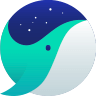
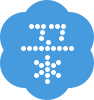

In [4]:
res.text
# 응답받은 정보인 (페이지정보) -> html 언어로 출력
# 현재 받아온 정보는 "문자열" 형태이기 때문에 컴퓨터 언어인 html언어로 변경 작업 필요

- BeautifulSoup 라이브러리
    - 응답받은 정보로부터 원하는 정보를 쉽게 추출하기 위해서 html언어로 parsing해주는 라이브러리
    - 컴퓨터가 알아들을 수 있는 언어로 변경

In [5]:
from bs4 import BeautifulSoup as bs
# 
#^ 💥넘겨받은 데이터가 문자열 형태이기 때문에 컴퓨터 접근을 위해  beautifulsoup객체화 진행💥

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
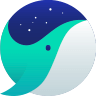
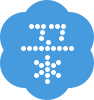

In [7]:
res = req.get("https://naver.com/")
# parsing 방법!
# bs(파싱할 데이터, 파싱방법)

# 객체화
soup = bs(res.text,"lxml")
soup

[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>,
 <a href="#themecast"><span>주제별캐스트 바로가기</span></a>,
 <a href="#timesquare"><span>타임스퀘어 바로가기</span></a>,
 <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a>,
 <a href="#account"><span>로그인 바로가기</span></a>,
 <a class="_3h-N8T9V" data-clk="dropbanner1a" href="https://whale.naver.com/ko/details/security/&amp;wpid=RydDy7"></a>,
 <a class="_2aeXMlrb BMgpjddw" data-clk="dropdownload1a" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #0436c7">다운로드</span></a>,
 <a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>,
 <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>,
 <a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</span></a>,
 <a class="link_happybin" data-cl
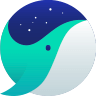
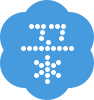

In [11]:
# "메일" -> a태그에 존재
soup.select("a")
# 우리가 원하는 정보가 아님 -> 모든 a태그를 추출했기 때문

- 선택자를 활용
    - id선택자 : (#) 중복이 불가능
    - class 선택자 : (.) 중복 가능

In [16]:
soup.select("a.nav")[0]
# soup.select() : 모든 데이터 추출 -> list형태로 출력
# 하나만 가져오고 싶다면 인덱싱 진행!

<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>

In [20]:
# 
#^ 요소 =태그 + 컨텐츠
#^ 💥soup.select_one(): 해당되는 데이터들 중 가장 위에 있는 데이터만 추출💥
soup.select_one(".nav")

<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>

In [21]:
# 순수한 "메일"이라는 글자만 추출하려면
# 즉 "컨텐츠"만 추출하는 방법 => 
#^ 요소.text
soup.select_one(".nav").text

'메일'

In [22]:
data2 = soup.select("a.nav")

for i in data2:
    print(i.text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV
사전
뉴스
증권
부동산
지도
VIBE
도서
웹툰


### 네이버 날씨에서 "현재온도" 수집하기

In [42]:
url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EB%82%A0%EC%94%A8"
res = req.get(url)
# parsing 방법!
# bs(파싱할 데이터, 파싱방법)
soup = bs(res.text,"lxml")
data = soup.select(".temperature_text strong")

In [49]:
print()
soup.select(".temperature_text strong")[0].text
soup.select_one(".temperature_text strong").text
# 쌤꺼
soup.select_one("div.temperature_text>strong").text

'현재 온도3.7°'

In [44]:
for i in data:
    print(i.text)

현재 온도3.7°
예측 온도4°
예측 온도10°
예측 온도-3°
예측 온도7°


### 뉴스제목 가져오기
- 1. 페이지 정보 요청하기
- 2. bs 객체화
- 3. 태그선택 (태그이름 선택자기호 이름)
- 4. 컨텐츠 추출

In [52]:
url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EB%82%A0%EC%94%A8"
res = req.get(url)
# parsing 방법!
# bs(파싱할 데이터, 파싱방법)
soup = bs(res.text,"lxml")

In [56]:
data = soup.select(".news_tit")
# 쌤
data = soup.select("a.news_tit")

In [58]:
for i in data:
    print(i.text)

오늘도 '초봄' 날씨…낮 최고 7~17도, 남부 곳곳 낮 15도 이상
건조한 날씨 속 산불 잇따라…'산불위기 경보' 상향
건조한 날씨에 산불 잇따라…위기경보 격상
[이주의 날씨]낮 포근하지만 출근길 영하권…미세먼지 주의
